In [5]:
tpath = '/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Train Image'
vpath= '/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Val'

In [6]:
import glob as gb

import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [14]:
training_data = keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 10,
    image_size =(300,300),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.2
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 10,
    image_size =(300,300),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='validation'
    
    )

Found 40000 files belonging to 20 classes.
Using 32000 files for training.
Found 40000 files belonging to 20 classes.
Using 8000 files for validation.


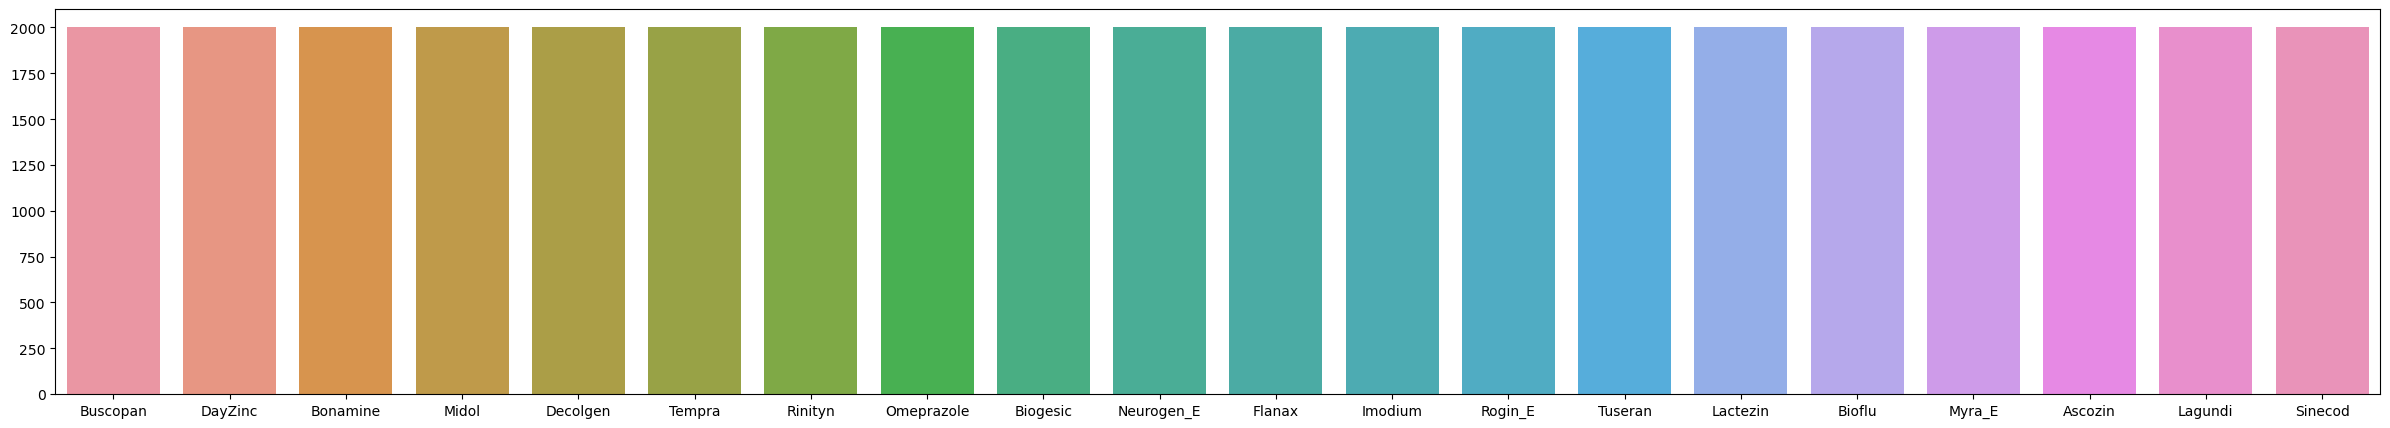

In [37]:
class_names = []
class_count = []
train_examples = 0
for f in os.listdir(tpath):
  files = gb.glob(pathname=str(tpath + "//" + f + "/*"))
  class_names.append(f)
  class_count.append(len(files))
  train_examples += len(files)
plt.figure(figsize=(30,5))
sns.barplot(x=class_names, y=class_count)
plt.show()

In [38]:
class_names

['Buscopan',
 'DayZinc',
 'Bonamine',
 'Midol',
 'Decolgen',
 'Tempra',
 'Rinityn',
 'Omeprazole',
 'Biogesic',
 'Neurogen_E',
 'Flanax',
 'Imodium',
 'Rogin_E',
 'Tuseran',
 'Lactezin',
 'Bioflu',
 'Myra_E',
 'Ascozin',
 'Lagundi',
 'Sinecod']

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
train_batch = train_gen.flow_from_directory(
    directory=tpath,
    target_size=(351,351),
    batch_size=16,
)
g_dict = train_batch.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_batch)      # get a batch size samples from the generator

# calculate number of displayed samples
length = len(labels)        # length of batch size
sample = min(length, 30)    # check if sample less than 25 images

plt.figure(figsize= (20, 20))

for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i]      # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [15]:
resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(include_top=False,
                   input_shape=(300,300,3),
                   pooling='avg',classes=20,
                   weights='imagenet')
for layer in pretrained_model.layers[:40]:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(20, activation='softmax'))

In [16]:
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.0009), metrics=['accuracy'])

In [17]:
epochs=10
history = resnet_model.fit(
    
  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
3200/3200 [==============================] - 335s 101ms/step - loss: 0.3021 - accuracy: 0.9111 - val_loss: 0.0763 - val_accuracy: 0.9764
Epoch 2/10
3200/3200 [==============================] - 321s 100ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 3/10
3200/3200 [==============================] - 321s 100ms/step - loss: 0.0261 - accuracy: 0.9925 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 4/10
3200/3200 [==============================] - 321s 100ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0618 - val_accuracy: 0.9869
Epoch 5/10
3200/3200 [==============================] - 322s 101ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 6/10
3200/3200 [==============================] - 321s 100ms/step - loss: 0.0109 - accuracy: 0.9973 - val_loss: 0.0414 - val_accuracy: 0.9884
Epoch 7/10
3200/3200 [==============================] - 320s 100ms/step - loss: 0.0095 - accuracy: 0.9974 - val_

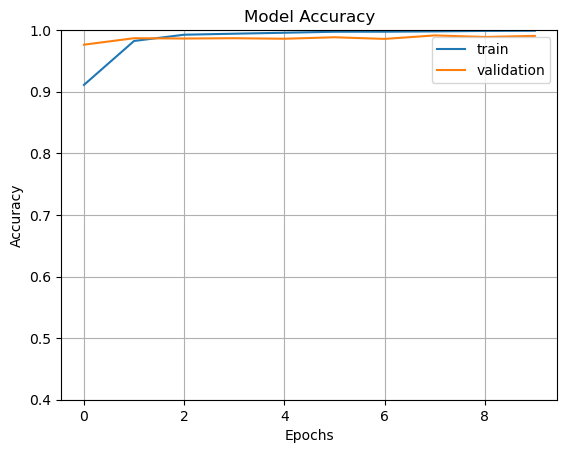

In [19]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
resnet_model.save('drug.h5')

In [21]:
!tar -zcvf mp.tgz drug.h5

drug.h5


In [6]:
from keras.models import load_model

In [7]:
resnet_model = load_model('/kaggle/working/drug.h5')

In [9]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Test/Biogesic/20230628_181402_016.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['Ascozin','Bioflu','Biogesic','Bonamine','Buscopan','DayZinc','Decolgen','Flanax','Imodium','Lactezin','Lagundi','Midol','Myra_E','Neurogen_E','Omeprazole','Rinityn','Rogin_E','Sinecod','Tempra','Tuseran']
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 0s 23ms/step
Predicted Class name: Biogesic


In [10]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Test/Bioflu/20230628_171737_006.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['Ascozin','Bioflu','Biogesic','Bonamine','Buscopan','DayZinc','Decolgen','Flanax','Imodium','Lactezin','Lagundi','Midol','Myra_E','Neurogen_E','Omeprazole','Rinityn','Rogin_E','Sinecod','Tempra','Tuseran']
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 0s 22ms/step
Predicted Class name: Bioflu


In [17]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Val/Neurogen_E/20230628_193915_006.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['Ascozin','Bioflu','Biogesic','Bonamine','Buscopan','DayZinc','Decolgen','Flanax','Imodium','Lactezin','Lagundi','Midol','Myra_E','Neurogen_E','Omeprazole','Rinityn','Rogin_E','Sinecod','Tempra','Tuseran']
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 0s 22ms/step
Predicted Class name: Neurogen_E


In [20]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Val/Flanax/20230628_184948_015.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['Ascozin','Bioflu','Biogesic','Bonamine','Buscopan','DayZinc','Decolgen','Flanax','Imodium','Lactezin','Lagundi','Midol','Myra_E','Neurogen_E','Omeprazole','Rinityn','Rogin_E','Sinecod','Tempra','Tuseran']
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 0s 21ms/step
Predicted Class name: Flanax


In [19]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img = load_img('/kaggle/input/pharmaceutical-drugs-and-vitamins-dataset-v2/Capsure Dataset/Val/Lagundi/20230628_093200_003.jpg')
img = img.resize((300,300))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(resnet_model.predict(x),axis=1)
class_names = ['Ascozin','Bioflu','Biogesic','Bonamine','Buscopan','DayZinc','Decolgen','Flanax','Imodium','Lactezin','Lagundi','Midol','Myra_E','Neurogen_E','Omeprazole','Rinityn','Rogin_E','Sinecod','Tempra','Tuseran']
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 0s 22ms/step
Predicted Class name: Lagundi


In [22]:
!pip install watson-machine-learning-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 11.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.3 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.13.3-py3-none-any.whl size=73933 sha256=eb8d56e9e8d765cf8803e57df15916e70dc6dbc75387242624b9e9174ff0b706
  Stored in directory: /root/.cache/pip/wheels/3d/66/8b/29c243b6686d64b0163675918d9546199d11f39f6e06f4933a
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.13.3-py3-none-any.whl size=634598 sha256=b6e04d06b3812a87af89fcdc0a8769fd3eea2e0000ae12f4e666eb6b3f52c059
  Stored in directory: /root/.

In [23]:
!pip install ibm_watson_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:0000:0100:01
  Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.16
    Uninstalling urllib3-1.26.16:
      Successfully uninstalled urllib3-1.26.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.3.2.1 requires dask==2023.3.2, but you have dask 2023.7.0 which is incompatible.
kfp 2.0.1 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
raft-dask 23.6.2 requires dask==2023.3.2, but you have dask 2023.7.0 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.


In [24]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"JAK8E-BQn3zJ9RSYTRgHMoNJYnB6rBgL01poG3oyKts7"
}


In [25]:
client = APIClient(wml_credentials)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
27f621fc-b6ad-40c6-989f-7041984feaae  Drug vision          2023-11-30T08:23:01.853Z
79926dc2-88b9-4fa8-84b2-1768514f42e5  Cards Resnet         2023-11-05T14:46:30.552Z
db786320-294d-49ff-ba9e-7eb5ff2b3d7d  Brain MRI            2023-10-15T14:14:06.585Z
11049ffe-06af-452c-b32d-d29e293d2192  Monkey pox           2023-08-17T09:54:47.506Z
56886624-ff3b-4ea8-9d59-b785dd1f0c29  Jungle_detective     2023-08-11T18:35:55.107Z
8e235c91-4b47-439b-a1ec-6f786c7bcf99  Marine Masterpieces  2023-08-04T19:44:37.676Z
0bba8d1c-0a3a-4705-9249-e5e1a92ff3f0  Farm Insect          2023-07-29T18:59:24.146Z
f6a89e40-2261-4cf5-84b6-921425d73421  FelinAI1             2023-07-27T08:16:30.535Z
------------------------------------  -------------------  ------------

,ID,NAME,CREATED
0,27f621fc-b6ad-40c6-989f-7041984feaae,Drug vision,2023-11-30T08:23:01.853Z
1,79926dc2-88b9-4fa8-84b2-1768514f42e5,Cards Resnet,2023-11-05T14:46:30.552Z
2,db786320-294d-49ff-ba9e-7eb5ff2b3d7d,Brain MRI,2023-10-15T14:14:06.585Z
3,11049ffe-06af-452c-b32d-d29e293d2192,Monkey pox,2023-08-17T09:54:47.506Z
4,56886624-ff3b-4ea8-9d59-b785dd1f0c29,Jungle_detective,2023-08-11T18:35:55.107Z
5,8e235c91-4b47-439b-a1ec-6f786c7bcf99,Marine Masterpieces,2023-08-04T19:44:37.676Z
6,0bba8d1c-0a3a-4705-9249-e5e1a92ff3f0,Farm Insect,2023-07-29T18:59:24.146Z
7,f6a89e40-2261-4cf5-84b6-921425d73421,FelinAI1,2023-07-27T08:16:30.535Z


In [27]:
space_uid = "27f621fc-b6ad-40c6-989f-7041984feaae"
space_uid

'27f621fc-b6ad-40c6-989f-7041984feaae'

In [28]:
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------  --------------------------
NAME                          ID                                    TYPE  STATE         REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  retired       runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  retired
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  retired
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  retired       runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  retired
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  retired       pytorch-onnx_rt22.2-py3.10
ai-function_0.1-py3.6         0cdb0f1e-5

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,retired,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,supported,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,retired,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,retired,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,supported,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,retired,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,retired,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,retired,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,retired,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,retired,


In [30]:
software_space_uid = client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")
software_space_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [32]:
model_details = client.repository.store_model(model="mp.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"Drug",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.9",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [33]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'type': 'tensorflow_2.9'},
 'metadata': {'created_at': '2023-11-30T08:25:19.299Z',
  'id': 'e23a88e9-5657-4e04-8e75-78b8a65550ee',
  'modified_at': '2023-11-30T08:25:28.597Z',
  'name': 'Drug',
  'owner': 'IBMid-662005295O',
  'resource_key': '7a2b21c3-ff2b-4d92-996f-c2aa49f09aae',
  'space_id': '27f621fc-b6ad-40c6-989f-7041984feaae'},
 'system': {'warnings': []}}

In [34]:
model_id = client.repository.get_model_id(model_details)
model_id

'e23a88e9-5657-4e04-8e75-78b8a65550ee'

In [35]:
client.repository.download(model_id,'cnn_ibm_Drug.tgz')

Successfully saved model content to file: 'cnn_ibm_Drug.tgz'


'/kaggle/working/cnn_ibm_Drug.tgz'

In [36]:
model_id

'e23a88e9-5657-4e04-8e75-78b8a65550ee'